In [118]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [119]:
url = 'https://en.wikipedia.org/wiki/List_of_Super_Bowl_champions'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html')

#second table in the wiki page
superbowl = soup.find_all('table')[1]

table = superbowl.find_all('th')
table = [tab.text.strip() for tab in table]

table

['Game',
 'Date/Season',
 'Winning team',
 'Score',
 'Losing team',
 'Venue',
 'City',
 'Attendance',
 'Referee',
 'Ref']

In [120]:
#turnign the website data into a df
df = pd.DataFrame(columns=table)
col_data = superbowl.find_all('tr')

for row in col_data[1:]:
  row_data = row.find_all('td')
  individual_row = [data.text.strip() for data in row_data]
  length = len(df)
  df.loc[length] = individual_row
df


,Game,Date/Season,Winning team,Score,Losing team,Venue,City,Attendance,Referee,Ref
0,I[sb 1],"January 15, 1967 (1966 AFL/1966 NFL)","Green Bay Packersn(1, 1–0)",35–10,"Kansas City Chiefsa(1, 0–1)",Los Angeles Memorial Coliseum,"Los Angeles, California[sb 2]","61,946",Norm Schachter,[7][8]
1,II[sb 1],"January 14, 1968 (1967 AFL/1967 NFL)","Green Bay Packersn(2, 2–0)",33–14,"Oakland Raidersa(1, 0–1)",Miami Orange Bowl,"Miami, Florida[sb 3]","75,546",Jack Vest,[9][8]
2,III[sb 1],"January 12, 1969 (1968 AFL/1968 NFL)","New York Jetsa(1, 1–0)",16–7,"Baltimore Coltsn(1, 0–1)",Miami Orange Bowl (2),"Miami, Florida (2)[sb 3]","75,389",Tom Bell,[10][8]
3,IV[sb 1],"January 11, 1970 (1969 AFL/1969 NFL)","Kansas City Chiefsa(2, 1–1)",23–7,"Minnesota Vikingsn(1, 0–1)",Tulane Stadium,"New Orleans, Louisiana","80,562",John McDonough,[11][8]
4,V,"January 17, 1971 (1970)","Baltimore ColtsA(2, 1–1)",16–13,"Dallas CowboysN(1, 0–1)",Miami Orange Bowl (3),"Miami, Florida (3)[sb 3]","79,204",Norm Schachter,[12][8]
5,VI,"January 16, 1972 (1971)","Dallas CowboysN(2, 1–1)",24–3,"Miami DolphinsA(1, 0–1)",Tulane Stadium (2),"New Orleans, Louisiana (2)","81,023",Jim Tunney,[13][8]
6,VII,"January 14, 1973 (1972)","Miami DolphinsA(2, 1–1)",14–7,"Washington RedskinsN(1, 0–1)",Los Angeles Memorial Coliseum (2),"Los Angeles, California (2)[sb 2]","90,182",Tom Bell,[14][8]
7,VIII,"January 13, 1974 (1973)","Miami DolphinsA(3, 2–1)",24–7,"Minnesota VikingsN(2, 0–2)",Rice Stadium[sb 4],"Houston, Texas","71,882",Ben Dreith,[15][8]
8,IX,"January 12, 1975 (1974)","Pittsburgh SteelersA(1, 1–0)",16–6,"Minnesota VikingsN(3, 0–3)",Tulane Stadium (3),"New Orleans, Louisiana (3)","80,997",Bernie Ulman,[16][8]
9,X,"January 18, 1976 (1975)","Pittsburgh SteelersA(2, 2–0)",21–17,"Dallas CowboysN(3, 1–2) [W]",Miami Orange Bowl (4),"Miami, Florida (4)[sb 3]","80,187",Norm Schachter,[17][8]


In [121]:
df.drop(['Game', 'Date/Season', 'City','Venue', 'Referee', 'Ref'], axis=1, inplace=True)
df['Winning team'] = df['Winning team'].astype(str)
df['Losing team'] = df['Losing team'].astype(str)
df['Score'] = df['Score'].astype(str)
df['Attendance'] = df['Attendance'].astype(str)

In [122]:
#cleaning
for index in range(len(df)):
  Wteam = df.at[index, 'Winning team']
  Wteam = Wteam[:Wteam.rfind('(') -1]
  df.at[index, 'Winning team'] = Wteam
  Lteam = df.at[index, 'Losing team']
  Lteam = Lteam[:Lteam.rfind('(') -1]
  df.at[index, 'Losing team'] = Lteam


df

,Winning team,Score,Losing team,Attendance
0,Green Bay Packers,35–10,Kansas City Chiefs,"61,946"
1,Green Bay Packers,33–14,Oakland Raiders,"75,546"
2,New York Jets,16–7,Baltimore Colts,"75,389"
3,Kansas City Chiefs,23–7,Minnesota Vikings,"80,562"
4,Baltimore Colts,16–13,Dallas Cowboys,"79,204"
5,Dallas Cowboys,24–3,Miami Dolphins,"81,023"
6,Miami Dolphins,14–7,Washington Redskins,"90,182"
7,Miami Dolphins,24–7,Minnesota Vikings,"71,882"
8,Pittsburgh Steelers,16–6,Minnesota Vikings,"80,997"
9,Pittsburgh Steelers,21–17,Dallas Cowboys,"80,187"


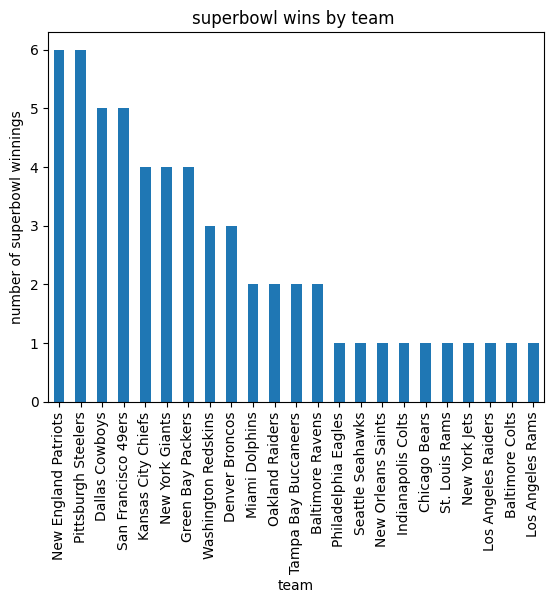

In [123]:
data = df['Winning team'].value_counts()

data.plot(kind='bar', )
plt.title('superbowl wins by team ')
plt.ylabel('number of superbowl winnings')
plt.xlabel('team')

plt.show()

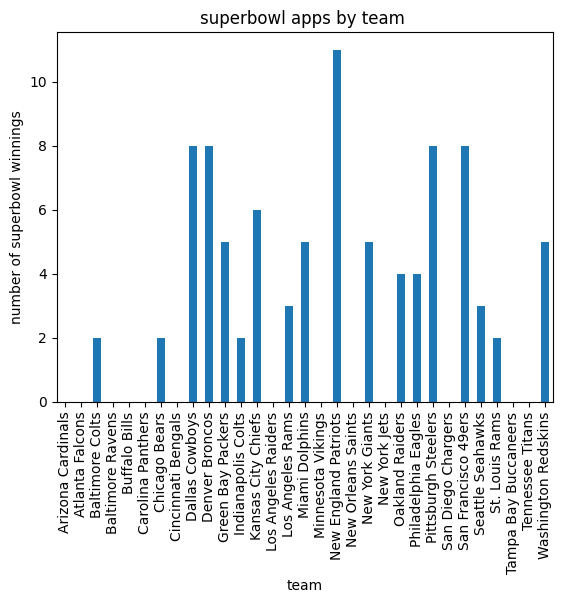

In [138]:
data = df['Winning team'].value_counts() +df['Losing team'].value_counts()
data = data.fillna(0)
data.sort_values()

data.plot(kind='bar' )
plt.title('superbowl apps by team ')
plt.ylabel('number of superbowl winnings')
plt.xlabel('team')

plt.show()
